In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import osmnx as ox
import networkx as nx
import geopandas as gpd
import folium
from folium import plugins
from folium.plugins import HeatMap


--------------------------

-------------------------

In [78]:
# 1. Imports
import pandas as pd
import geopandas as gpd
import ast
import matplotlib.pyplot as plt

# 2. Data loading

congestion_data_path = "../../data/tidy/congestion-exploration19_MM.csv"
congestion_exploration_df  = pd.read_csv(congestion_data_path)

msa_municipality_path = "../../data/tidy/msa-municipality.csv"
msa_municipality_df = pd.read_csv(msa_municipality_path)

# Loading the county-level shapefile
us_county_shapefile_path = "../../data/tl_2022_us_county/tl_2022_us_county.shp"
us_counties_shapefile  = gpd.read_file(us_county_shapefile_path)

# Keeping only the required columns
congestion_exploration_df = congestion_exploration_df[['msa', 'tti']]
congestion_exploration_df['msa'] = congestion_exploration_df['msa'].str.strip()
msa_municipality_df['msa'] = msa_municipality_df['msa'].str.split(',').str[0].str.strip()


# Removing the state code from the 'msa' column in the congestion exploration data
congestion_exploration_df['msa'] = congestion_exploration_df['msa'].str.split(',').str[0]

# Merging the two dataframes on the 'msa' column again
merged_df = pd.merge(congestion_exploration_df, msa_municipality_df, on='msa', how='inner')

# Checking the first few rows of the merged dataframe
# merged_df


In [79]:
# Importing necessary libraries
import ast

# Function to process the municipality column
def process_municipality(row, shapefile):
    # Parsing the list of counties from the municipality column
    counties = ast.literal_eval(row['municipality'])
    
    # Removing state code from the county names to match the shapefile
    county_names = [county.split(',')[0] for county in counties]
    
    # Filtering the shapefile based on the county names
    filtered_shapefile = shapefile[shapefile['NAME'].isin(county_names)]
    
    # Assigning the 'tti' value to the filtered shapefile
    filtered_shapefile['tti'] = row['tti']
    
    return filtered_shapefile

# Applying the process_municipality function to the merged DataFrame
shapefile_with_tti = pd.concat([process_municipality(row, us_counties_shapefile) for _, row in merged_df.iterrows()])

# Checking the first few rows of the shapefile with 'tti' values
# shapefile_with_tti.head()


c:\Users\mazee\miniconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mazee\miniconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mazee\miniconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [80]:
# Function to process the municipality column (updated to remove the word "County")
def process_municipality_updated(row, shapefile):
    # Parsing the list of counties from the municipality column
    counties = ast.literal_eval(row['municipality'])
    
    # Removing "County" and state code from the county names to match the shapefile
    county_names = [county.split(' County,')[0] for county in counties]
    
    # Filtering the shapefile based on the county names
    filtered_shapefile = shapefile[shapefile['NAME'].isin(county_names)]
    
    # Assigning the 'tti' value to the filtered shapefile
    filtered_shapefile['tti'] = row['tti']
    
    return filtered_shapefile

# Applying the updated process_municipality function to the merged DataFrame
shapefile_with_tti_updated = pd.concat([process_municipality_updated(row, us_counties_shapefile) for _, row in merged_df.iterrows()])


c:\Users\mazee\miniconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mazee\miniconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mazee\miniconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [81]:

# # Plotting the updated choropleth map with a red theme
# fig, ax = plt.subplots(figsize=(20, 10))
# shapefile_with_tti_updated.plot(column='tti', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# plt.title('U.S. MSAs Colored by TTI Value', fontsize=15)
# plt.axis('off')
# plt.show()


In [82]:
# save the shapefile with tti values
shapefile_with_tti_updated.to_file("shapefiles/shapefile_with_tti_updated.shp")
shapefile_with_tti_updated.to_csv("shapefiles/shapefile_with_tti_updated.csv")

# Now plot the map


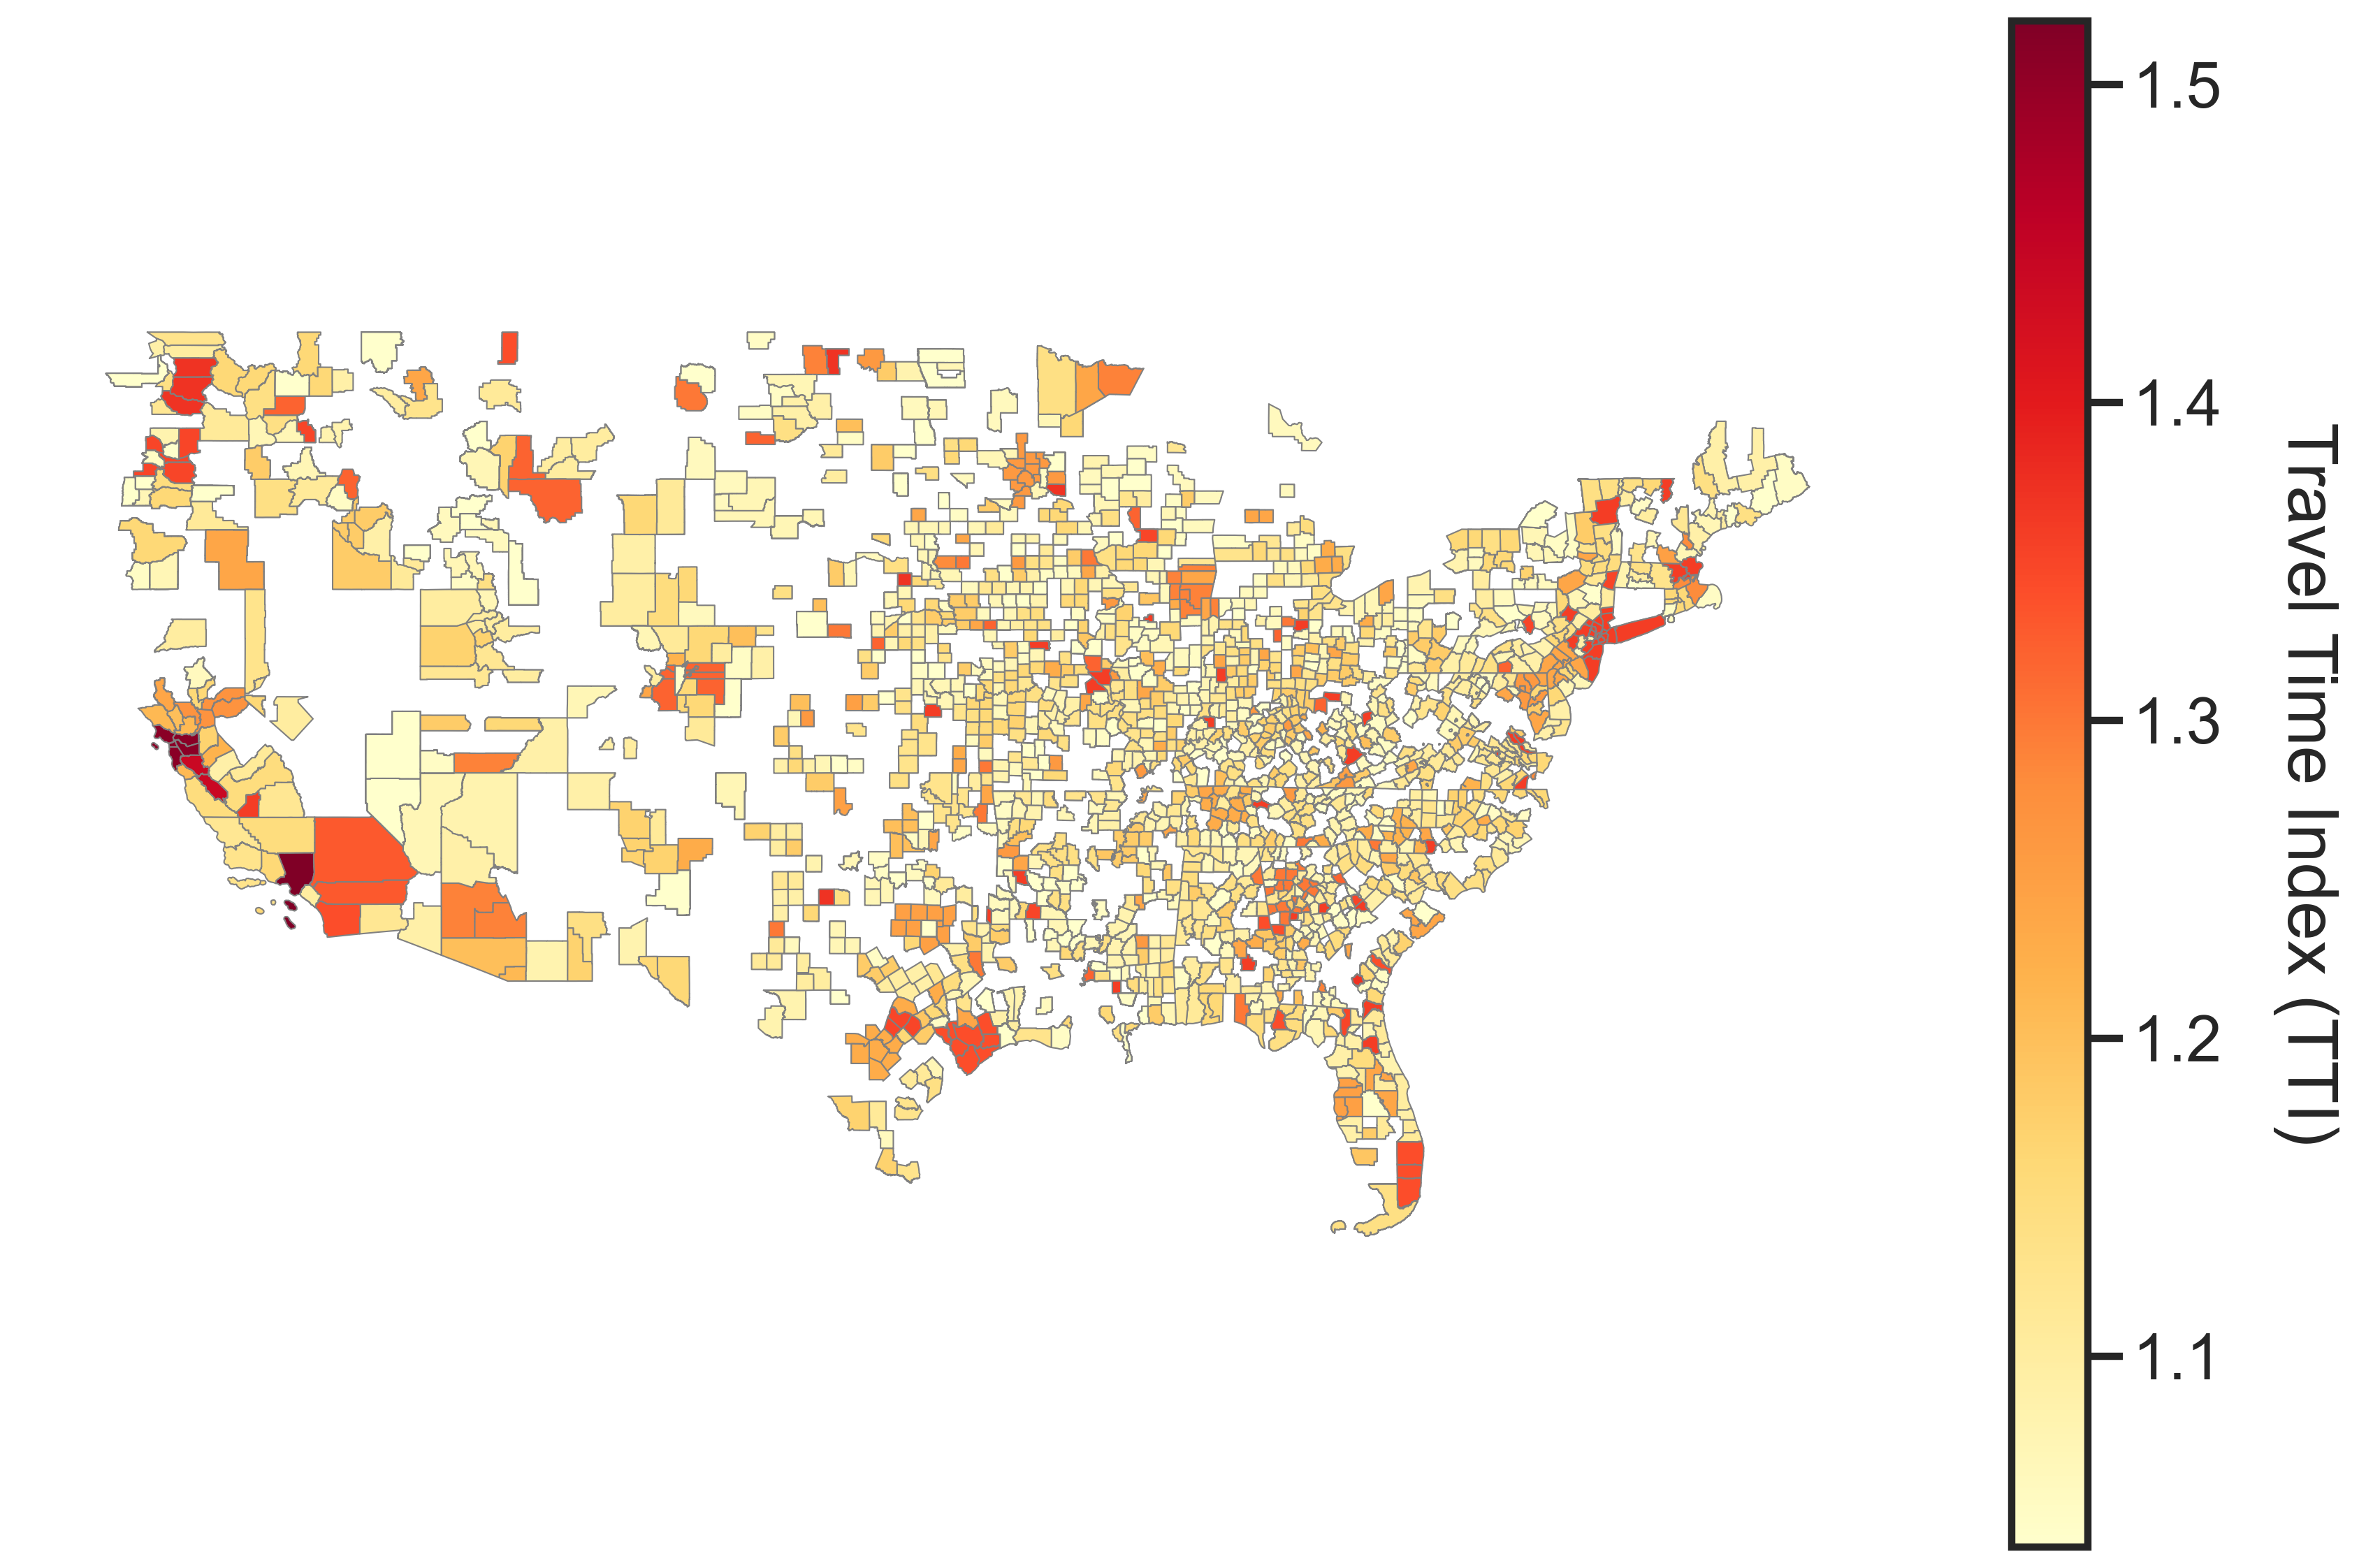

In [93]:
shapefile_data  = shapefile_with_tti_updated.copy()

sns.set(style="white", font_scale=1, rc={"lines.linewidth": 1.5}, palette="muted", color_codes=True, context="poster")

# Defining a bounding box that covers the contiguous United States
bounding_box = {
    "minx": -125,
    "miny": 24,
    "maxx": -67,
    "maxy": 49
}

# Filtering the shapefile data to only include counties within the bounding box
filtered_shapefile = shapefile_data.cx[bounding_box["minx"]:bounding_box["maxx"], bounding_box["miny"]:bounding_box["maxy"]]

# Plotting the map with the filtered data
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'aspect': 'equal'}, dpi=300)
filtered_shapefile.plot(column='tti', cmap='YlOrRd', 
                        linewidth=0.5, ax=ax, edgecolor='0.5', legend=True,
                        # cmap='Reds'
                        )
# plt.title('US Counties (2019)', pad=30)
plt.axis('off')
# set title of the colorbar
cax = fig.axes[1]
cax.set_ylabel('Travel Time Index (TTI)', rotation=270, labelpad=40)
# save figure
plt.savefig("Counties-Map.png")
# tight layout
plt.tight_layout()
plt.show()

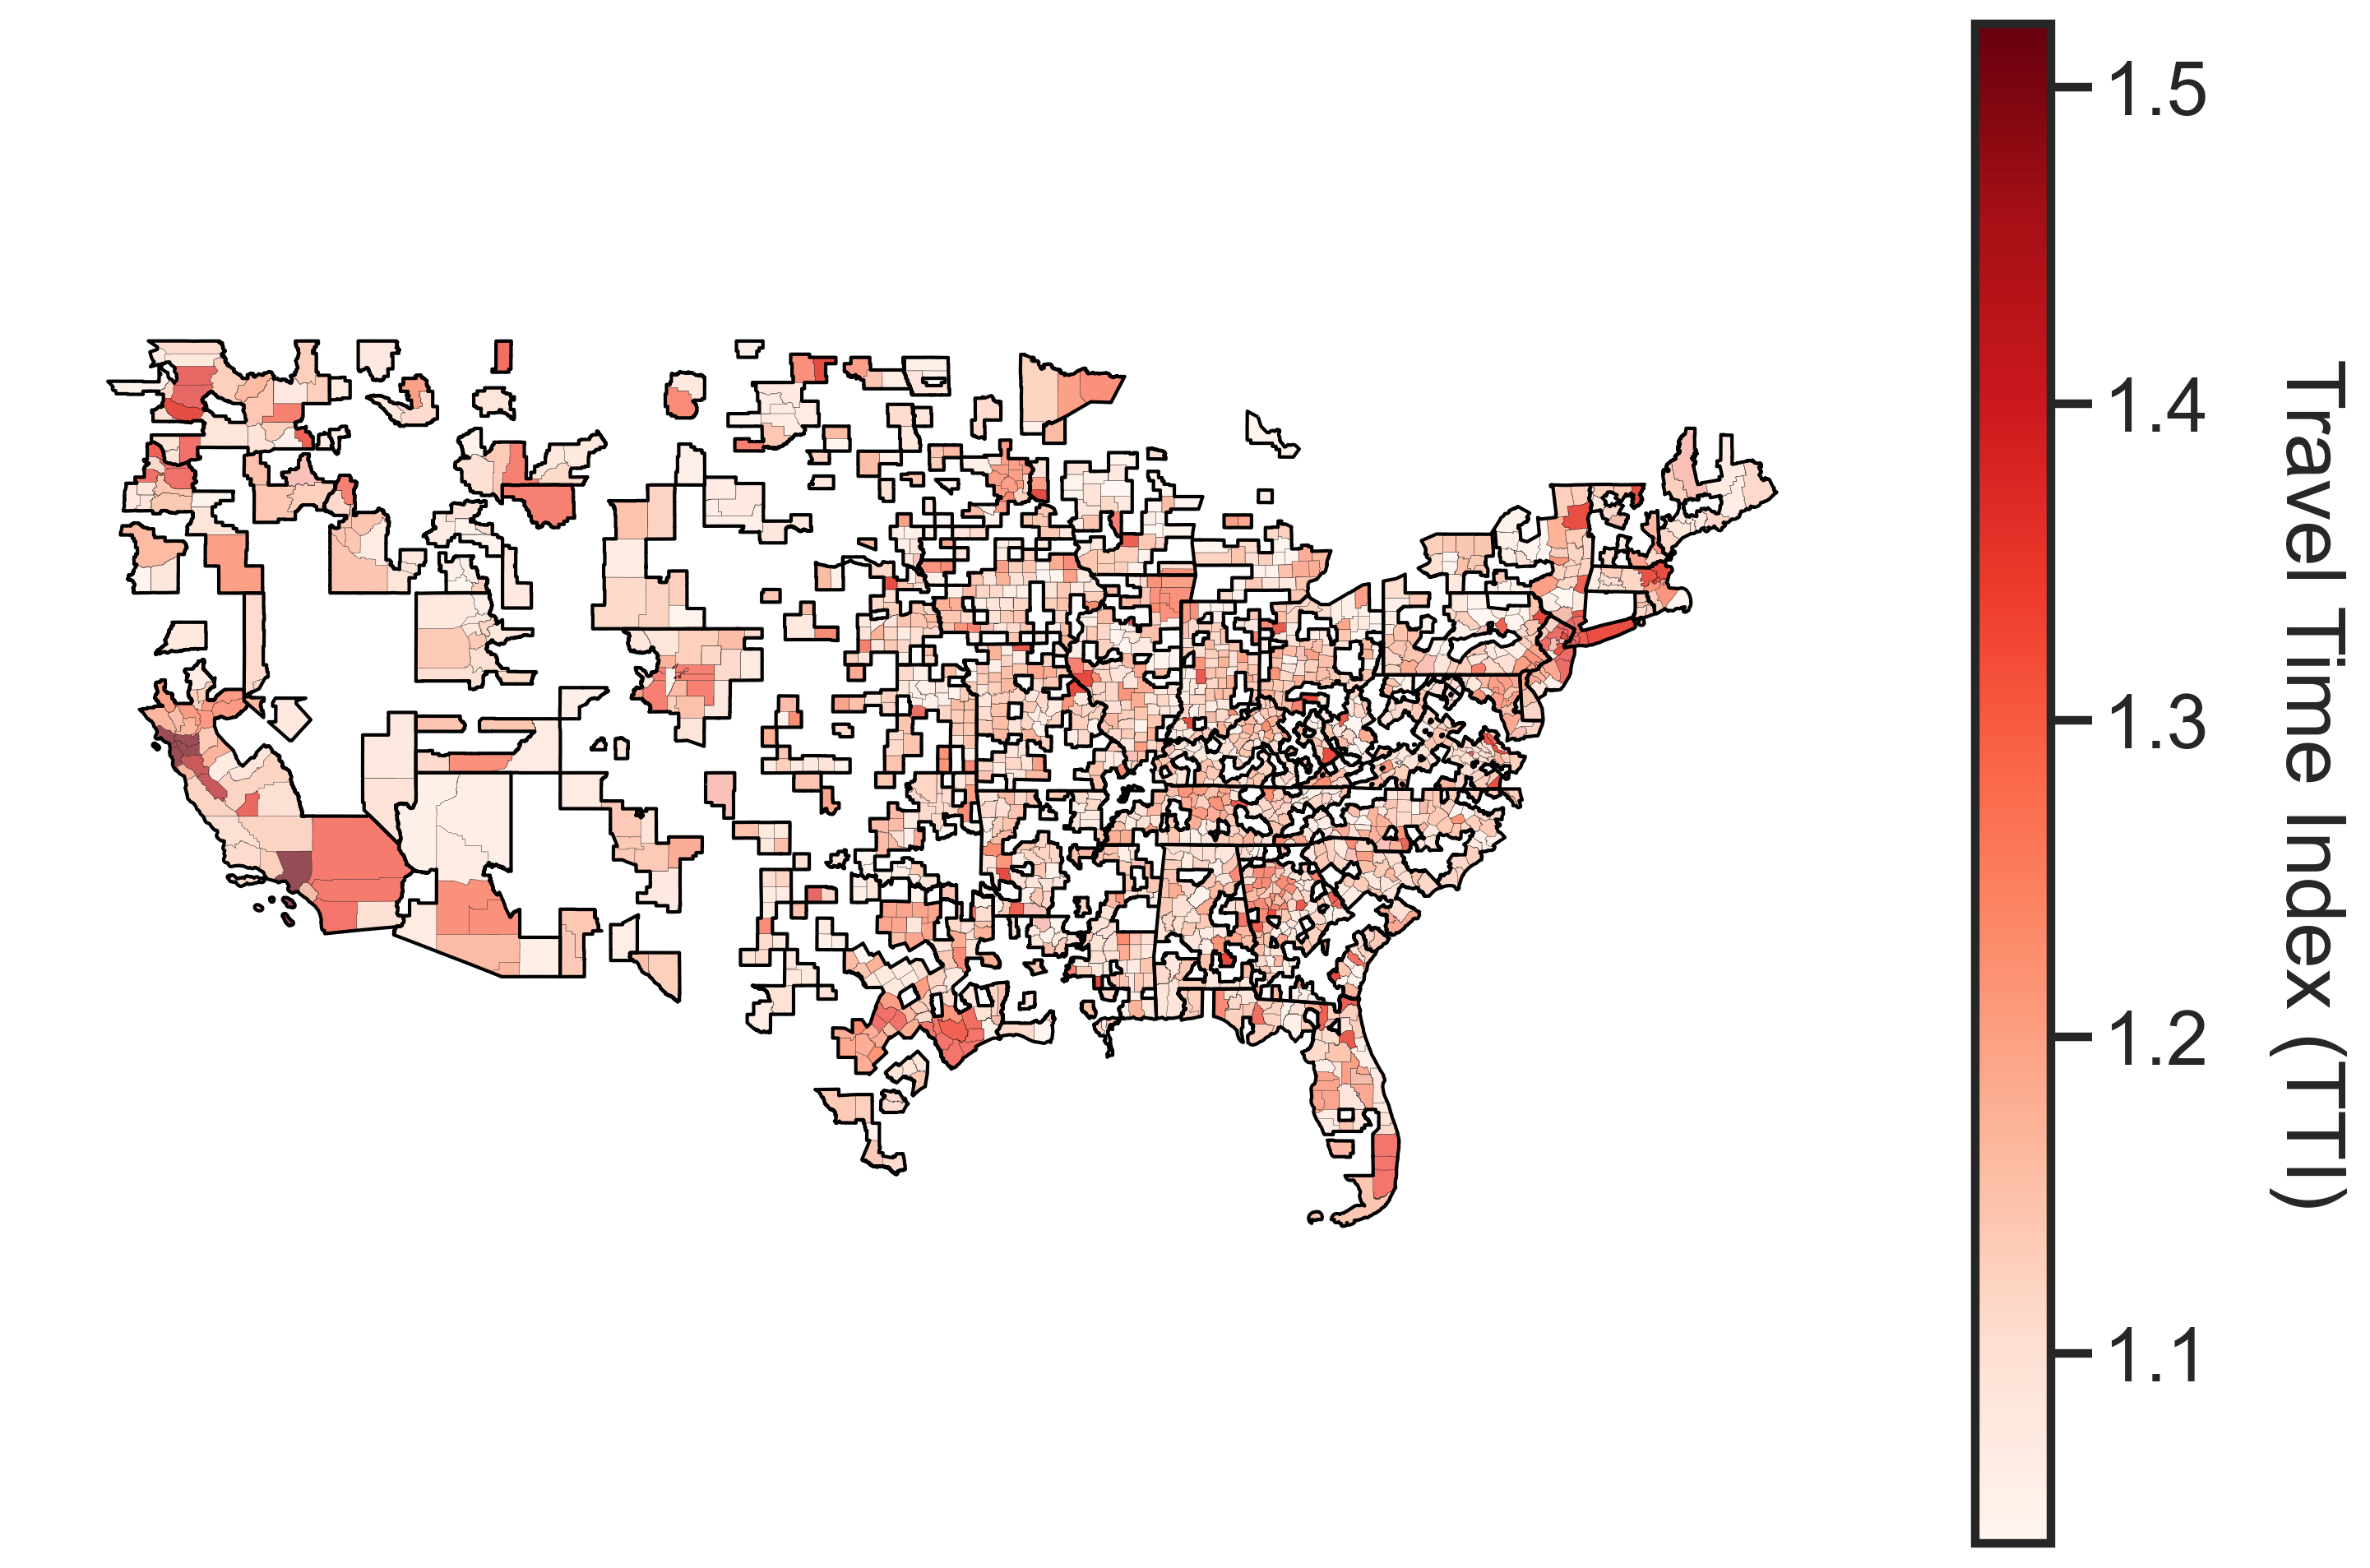

In [90]:
# Plotting the map with enhanced aesthetics
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'aspect': 'equal'}, dpi=300)

# Using a more visually appealing color map
filtered_shapefile.plot(column='tti', linewidth=0.1, ax=ax, edgecolor='k', legend=True, alpha=0.7, cmap='Reds') #YlOrRd

# Adding state borders by dissolving by state code
states = filtered_shapefile.dissolve(by='STATEFP')
states.boundary.plot(ax=ax, linewidth=1, color='black')

# # Adding state labels (centroid of each state)
# for x, y, label in zip(states.geometry.centroid.x, states.geometry.centroid.y, states.index):
#     ax.text(x, y, label, fontsize=9, ha='center')

# Adding title
# plt.title('US Counties (2019)', fontsize=15)

# Removing axis for a cleaner look
plt.axis('off')
# set title of the colorbar
cax = fig.axes[1]
cax.set_ylabel('Travel Time Index (TTI)', rotation=270, labelpad=40)
plt.show()


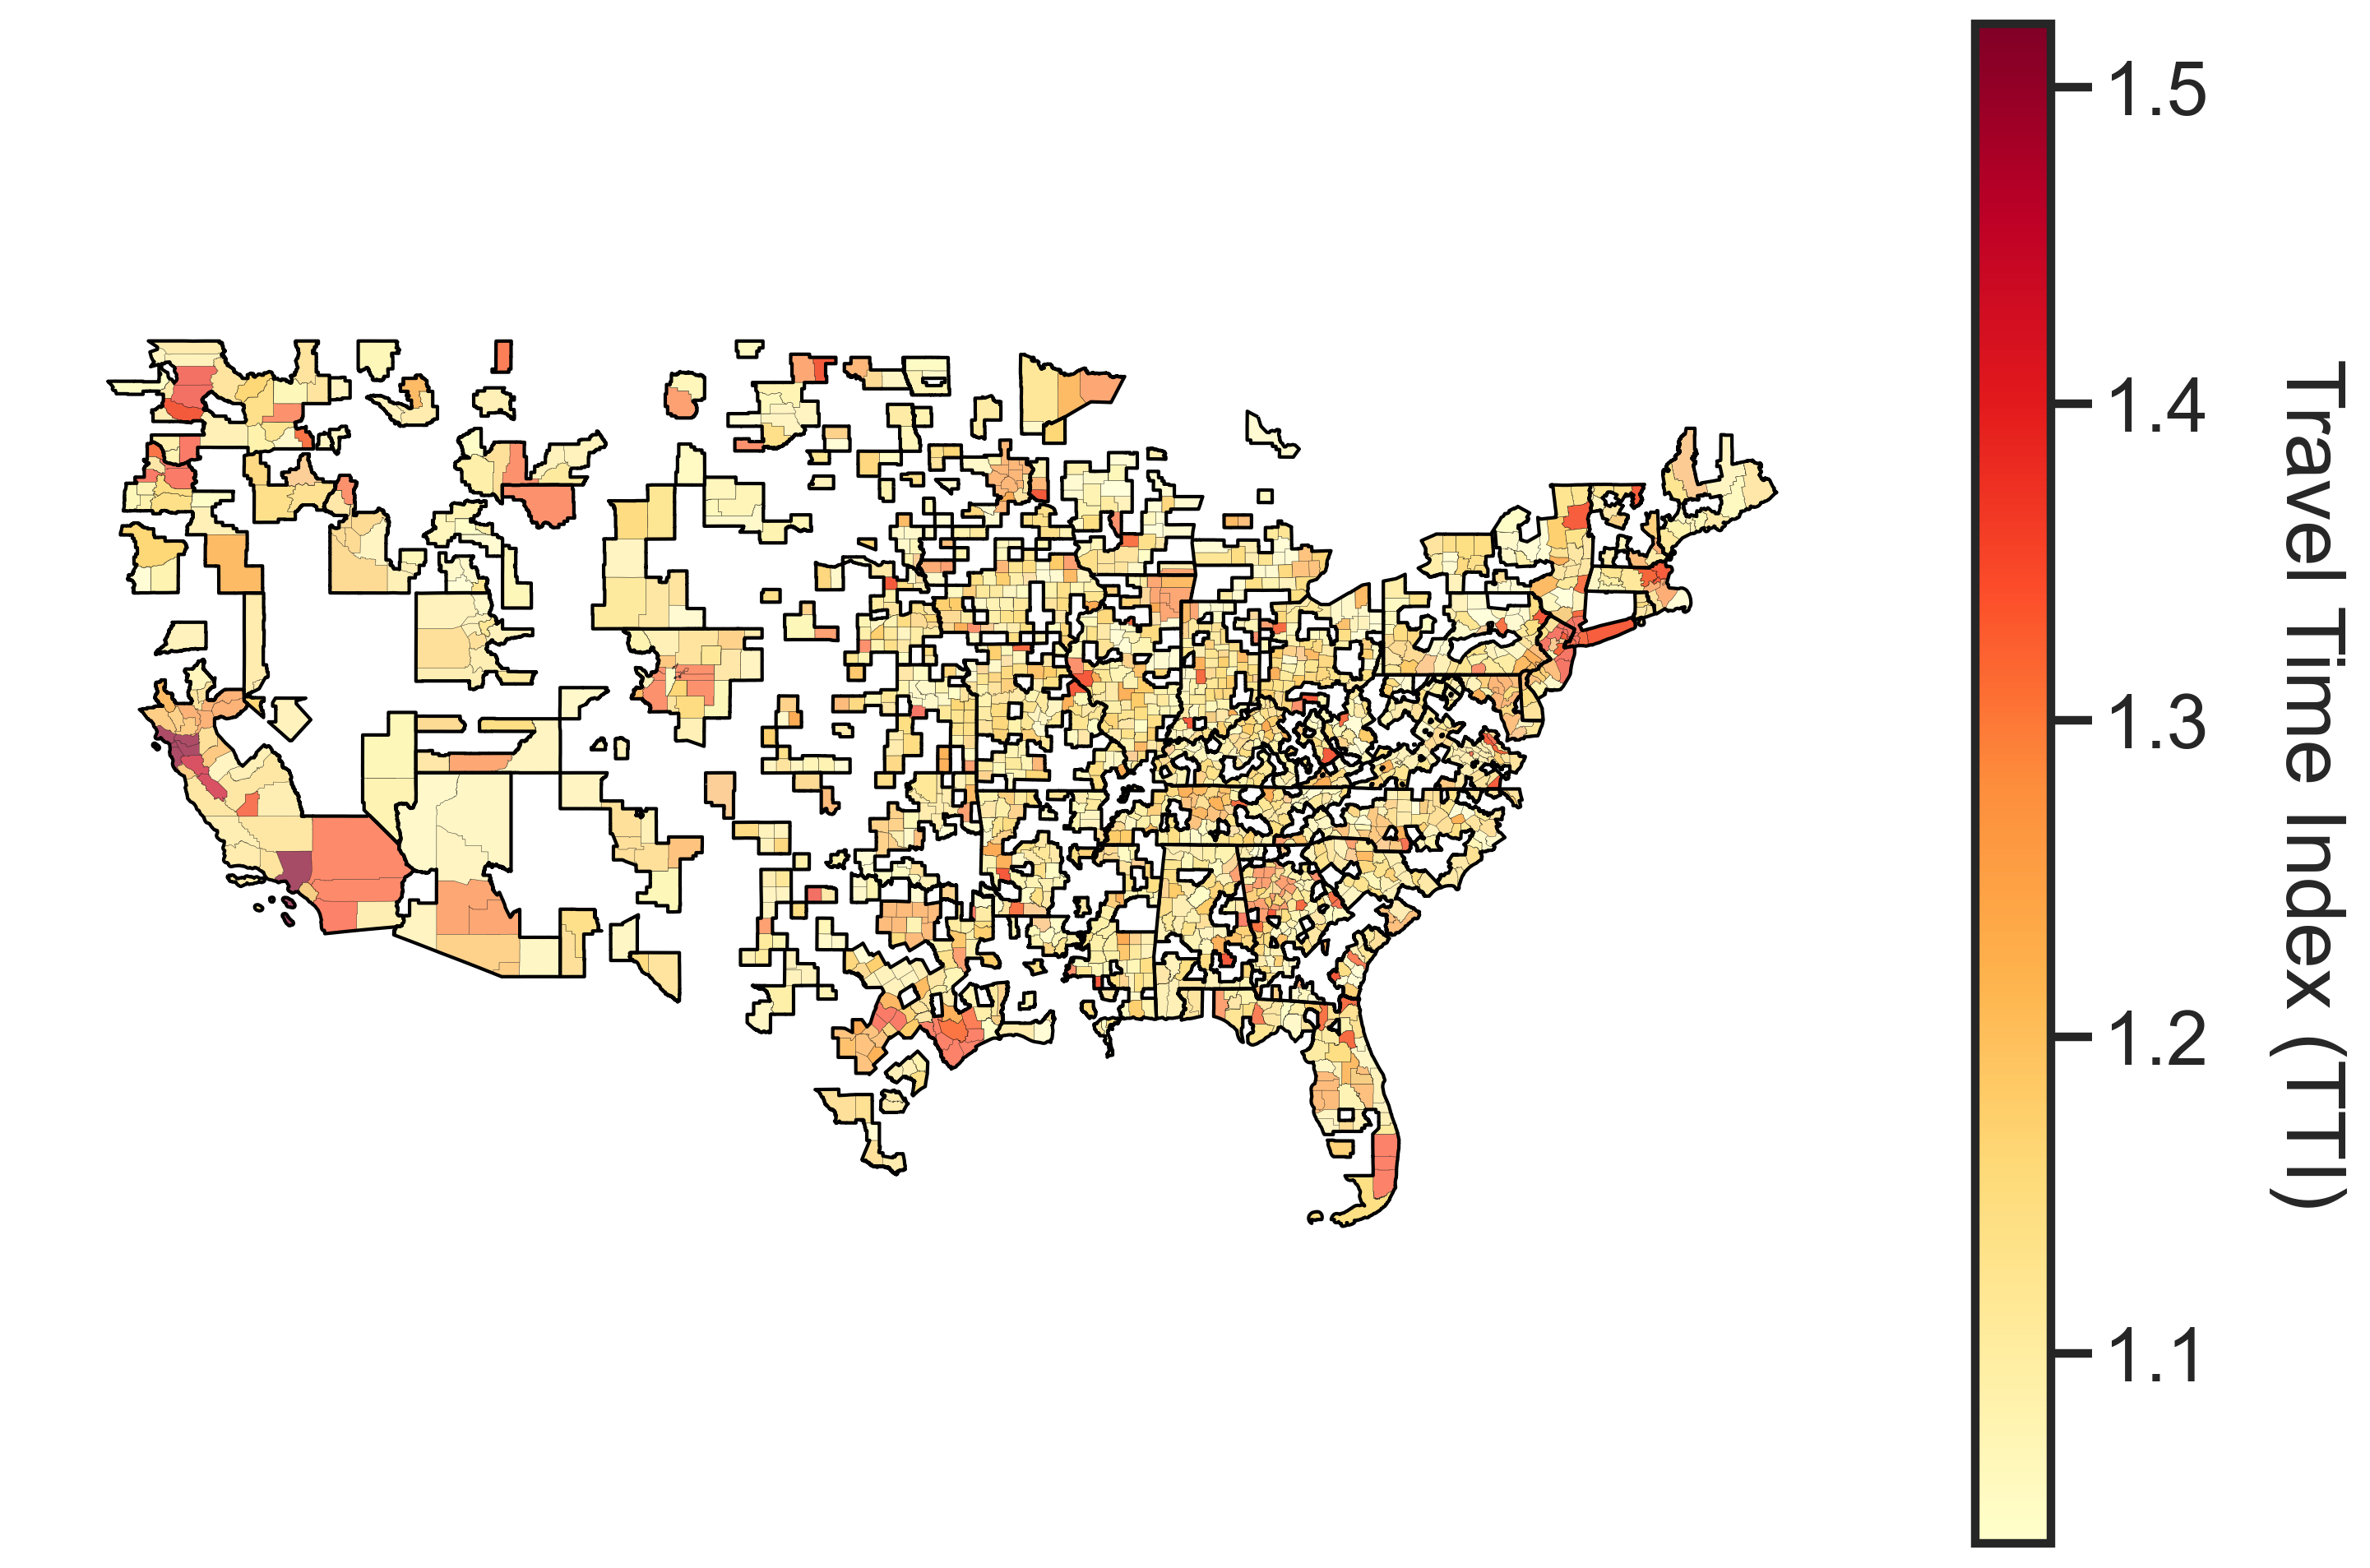

In [91]:
# Plotting the map with enhanced aesthetics
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'aspect': 'equal'}, dpi=300)

# Using a more visually appealing color map
filtered_shapefile.plot(column='tti', linewidth=0.1, ax=ax, edgecolor='k', legend=True, alpha=0.7, cmap='YlOrRd') #YlOrRd

# Adding state borders by dissolving by state code
states = filtered_shapefile.dissolve(by='STATEFP')
states.boundary.plot(ax=ax, linewidth=1, color='black')

# # Adding state labels (centroid of each state)
# for x, y, label in zip(states.geometry.centroid.x, states.geometry.centroid.y, states.index):
#     ax.text(x, y, label, fontsize=9, ha='center')

# Adding title
# plt.title('US Counties (2019)', fontsize=15)

# Removing axis for a cleaner look
plt.axis('off')
# set title of the colorbar
cax = fig.axes[1]
cax.set_ylabel('Travel Time Index (TTI)', rotation=270, labelpad=40)
plt.show()

KeyboardInterrupt: 

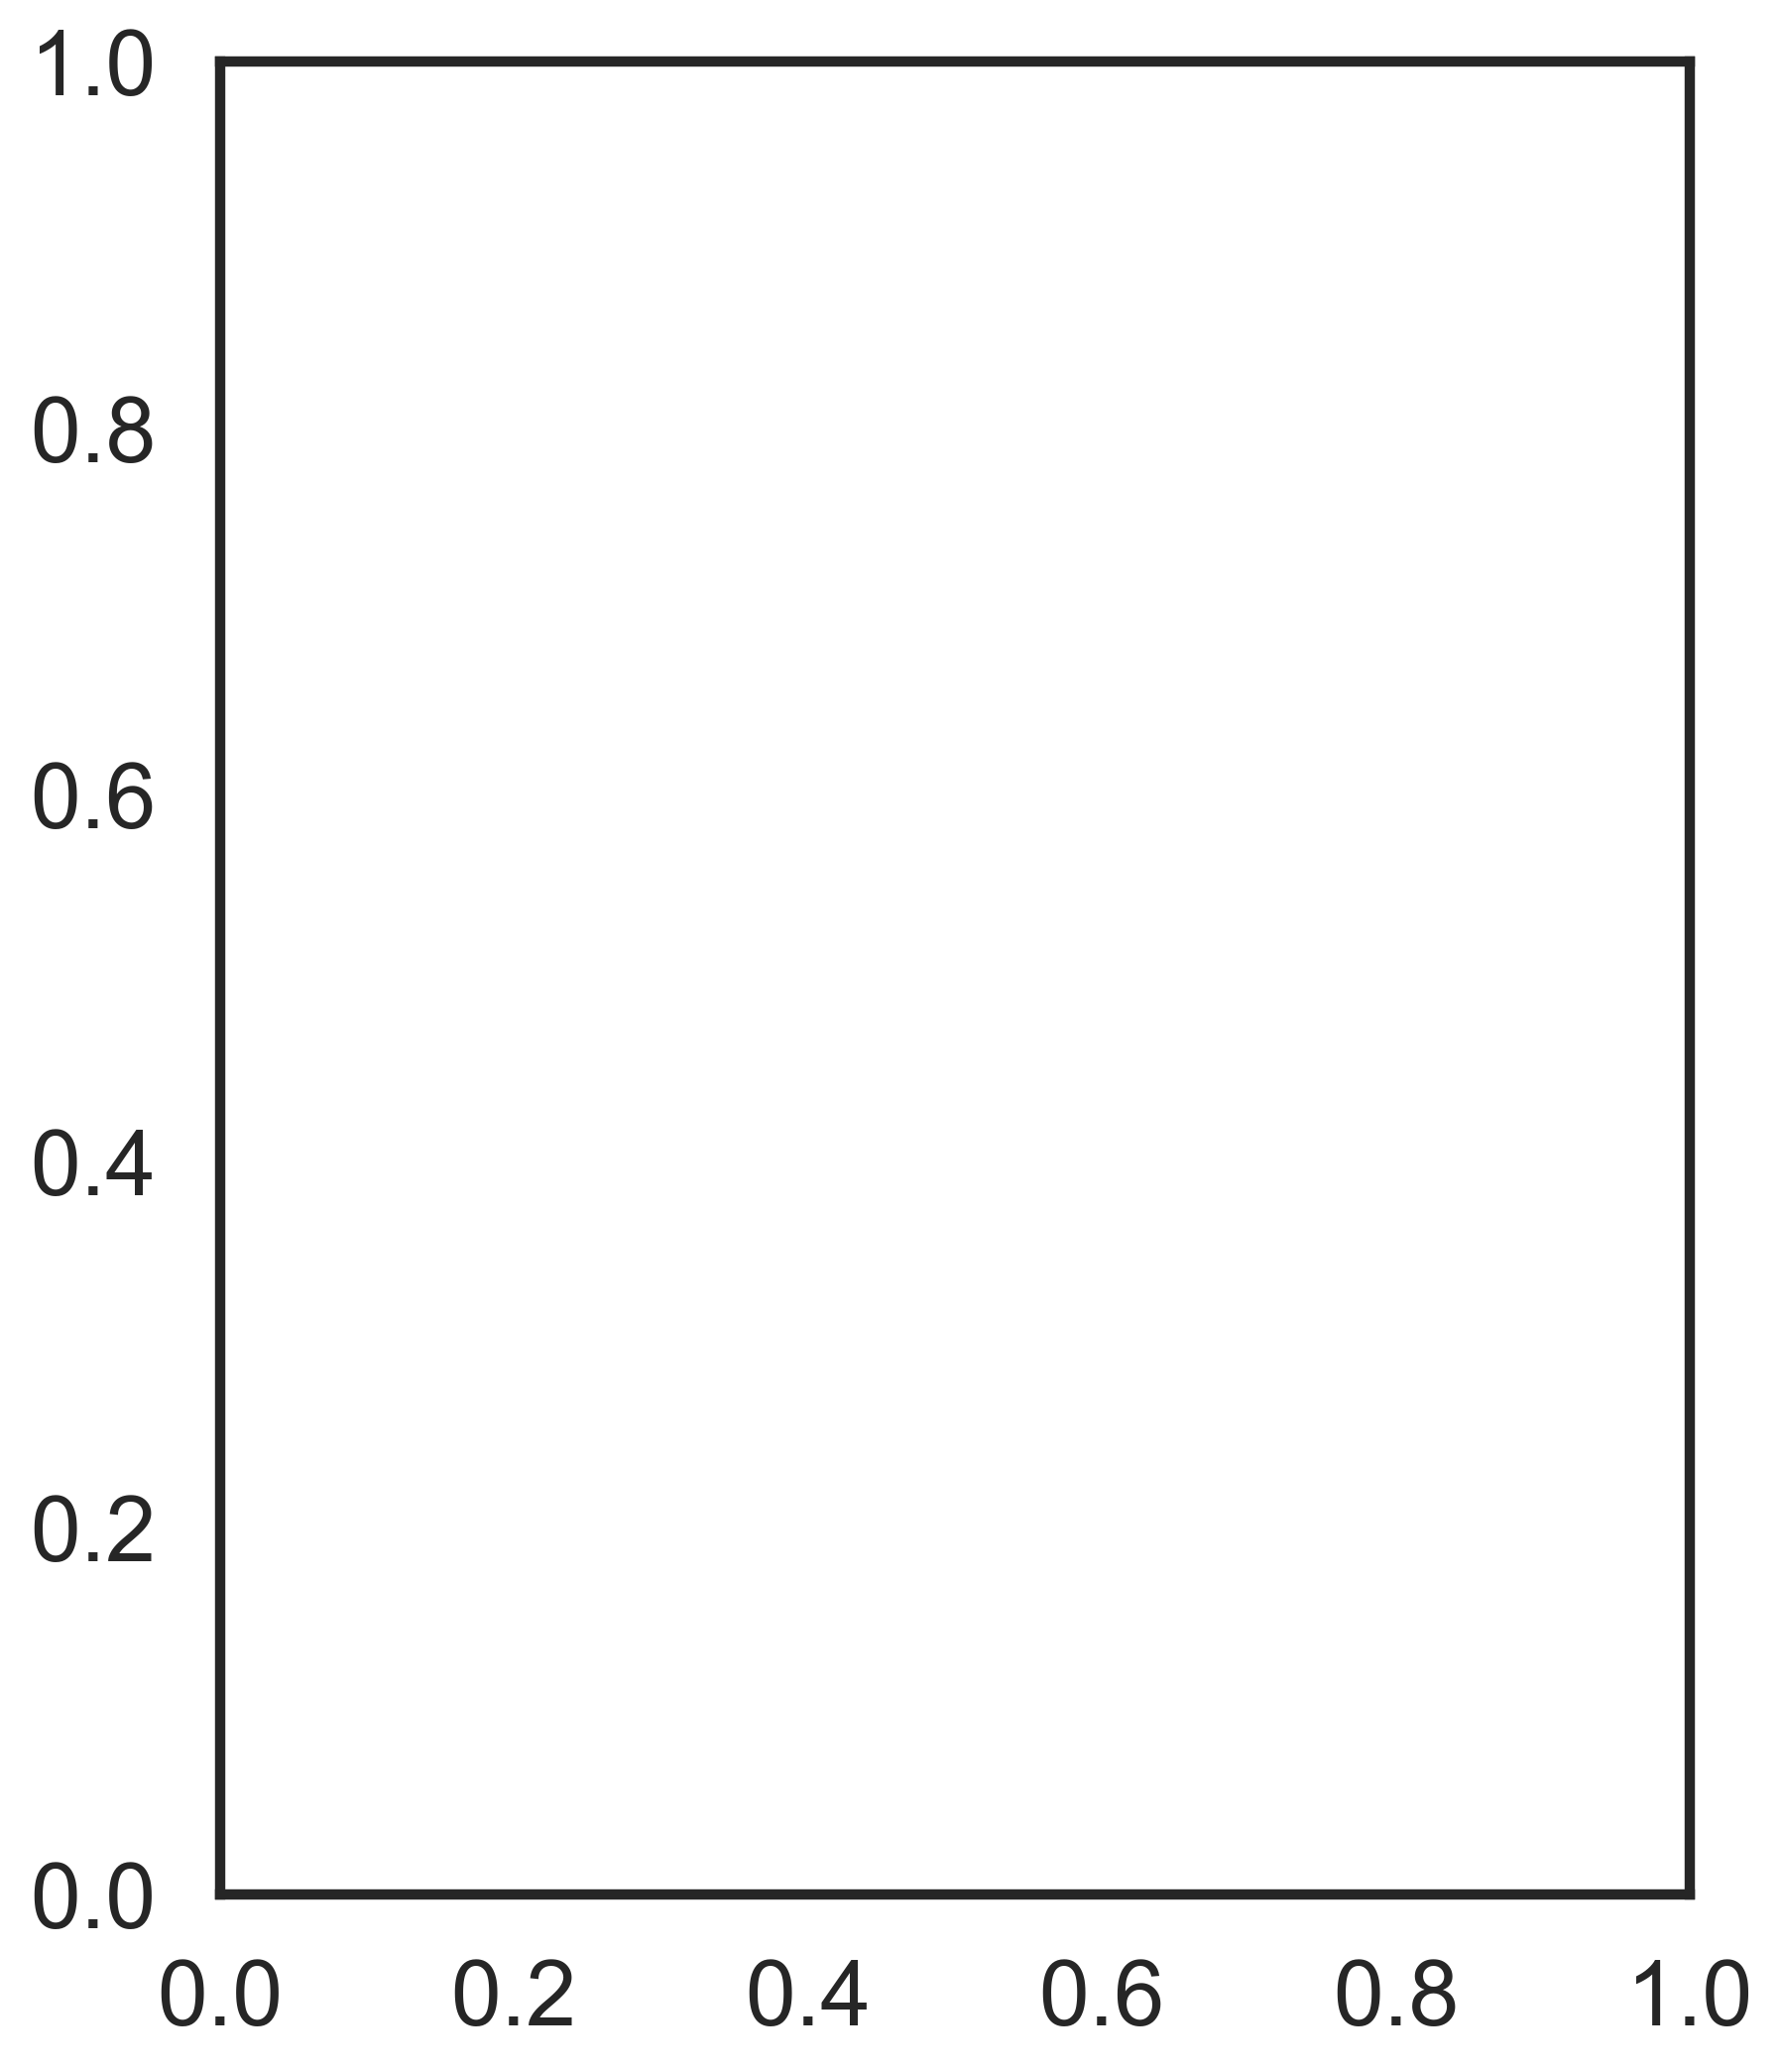

In [95]:
# Plotting the map with enhanced aesthetics
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'aspect': 'equal'}, dpi=300)

# Using a more visually appealing color map
filtered_shapefile.plot(column='tti', linewidth=0.1, ax=ax, edgecolor='k', legend=True, alpha=0.7, cmap='Blues') #YlOrRd

# Adding state borders by dissolving by state code
states = filtered_shapefile.dissolve(by='STATEFP')
states.boundary.plot(ax=ax, linewidth=1, color='black')

# # Adding state labels (centroid of each state)
# for x, y, label in zip(states.geometry.centroid.x, states.geometry.centroid.y, states.index):
#     ax.text(x, y, label, fontsize=9, ha='center')

# Adding title
# plt.title('US Counties (2019)', fontsize=15)

# Removing axis for a cleaner look
plt.axis('off')
# set title of the colorbar
cax = fig.axes[1]
cax.set_ylabel('Travel Time Index (TTI)', rotation=270, labelpad=40)
# make the bar shorter 


plt.show()

## Make the color bar smaller
## Add a background map